# REDUCTION DE GRILLE AU LOTO

Pour jouer à LOTO®, il vous suffit de cocher 6 numéros : 5 numéros sur une grille de 49 numéros et 1 numéro chance sur une grille de 10 numéros. Vous remportez le jackpot si vous avez 5 numéros gagnants et le numéro complémentaire. Le prix d’une grille est de 2,20 €. Le jackpot minimum est de 2 millions d’euros. S’il n’est pas remporté le jour du tirage, le jackpot progresse d’1 million d’euros.

Depuis novembre 2019, vous pouvez également choisir l’option 2nd tirage, pour 0,80€ supplémentaires. Elle vous permet de retenter votre chance avec les mêmes 5 numéros de la grille, hors numéro Chance.

Pour chaque prise de jeu chez un détaillant, sur le site fdj.fr ou sur notre application jeu FDJ® iOS ou Android, vous avez le choix entre 2 types de grilles :

Grille simple : vous optez pour 5 numéros et 1 numéro chance sur une grille à 2,20 €.
Grille multiple : vous sélectionnez plus de numéros et/ ou plus de numéros « chance ». Le prix d’une grille multiple dépend du nombre de numéros choisis. Retrouvez toutes les combinaisons possibles pour jouer.

Vous avez la possibilité de cocher l’option de jeu « 2nd tirage » en rejouant vos 5 numéros et d’augmenter vos chances de gain à près d’une sur 4 pour un Jackpot de 100 000€ minimum(1l) à partager.


Quand ont lieu les tirages du LOTO® ?

Les tirages du LOTO® ont lieu tous les lundis, mercredis et samedis à 20h20. Il s’agit également de l’heure limite pour annuler votre prise de jeu. Il ne s’agit pas de l’heure de diffusion des résultats des tirages.

## Recuperation des données

In [2]:
import urllib.request
import zipfile
import io 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import operator as op
import itertools




### Telechargement et decompression des données

In [3]:
url = "https://media.fdj.fr/static-draws/csv/loto/loto_201911.zip" # URL du fichier zip à télécharger
filename = "fichier.zip" # Nom du fichier zip à enregistrer
foldername = "/home/kevin/workspace/py-sql/loto/data" # Nom du dossier où extraire le contenu du fichier zip

# Télécharger le fichier zip
urllib.request.urlretrieve(url, filename)

# Ouvrir le fichier zip
zip = zipfile.ZipFile(filename)

# Extraire le contenu du fichier zip dans un dossier
zip.extractall(foldername)

# Fermer le fichier zip
zip.close()

### Etude du csv

In [4]:
# Chargement des données
data = pd.read_csv("/home/kevin/workspace/py-sql/loto/data/loto_201911.csv", sep=";")
data.head()

,annee_numero_de_tirage,jour_de_tirage,date_de_tirage,date_de_forclusion,boule_1,boule_2,boule_3,boule_4,boule_5,numero_chance,...,rapport_du_rang1_second_tirage,nombre_de_gagnant_au_rang_2_second_tirage,rapport_du_rang2_second_tirage,nombre_de_gagnant_au_rang_3_second_tirage,rapport_du_rang3_second_tirage,nombre_de_gagnant_au_rang_4_second_tirage,rapport_du_rang4_second_tirage,numero_jokerplus,devise,Unnamed: 49
0,20233042,SAMEDI,08/04/2023,08/06/2023,19,35,48,3,42,10,...,151856,421,"1174,8",17795,"71,4",261431,6,Jokerplus indisponible,eur,NaN
1,20233041,MERCREDI,05/04/2023,05/06/2023,31,33,16,29,39,2,...,124578,292,"398,3",12140,"24,6",165532,3,3 080 596,eur,NaN
2,20233040,LUNDI,03/04/2023,03/06/2023,49,15,39,31,46,4,...,104597,312,300,11691,"20,5",143819,3,0 833 472,eur,NaN
3,20233039,SAMEDI,01/04/2023,01/06/2023,44,48,17,12,35,8,...,42409,457,"347,5",16857,"24,2",224897,3,9 211 458,eur,NaN
4,20233038,MERCREDI,29/03/2023,29/05/2023,34,1,32,14,11,9,...,24256,436,"231,4",15008,"17,2",175833,3,9 652 847,eur,NaN


In [5]:
print(data.columns.tolist()) 

['annee_numero_de_tirage', 'jour_de_tirage', 'date_de_tirage', 'date_de_forclusion', 'boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5', 'numero_chance', 'combinaison_gagnante_en_ordre_croissant', 'nombre_de_gagnant_au_rang1', 'rapport_du_rang1', 'nombre_de_gagnant_au_rang2', 'rapport_du_rang2', 'nombre_de_gagnant_au_rang3', 'rapport_du_rang3', 'nombre_de_gagnant_au_rang4', 'rapport_du_rang4', 'nombre_de_gagnant_au_rang5', 'rapport_du_rang5', 'nombre_de_gagnant_au_rang6', 'rapport_du_rang6', 'nombre_de_gagnant_au_rang7', 'rapport_du_rang7', 'nombre_de_gagnant_au_rang8', 'rapport_du_rang8', 'nombre_de_gagnant_au_rang9', 'rapport_du_rang9', 'nombre_de_codes_gagnants', 'rapport_codes_gagnants', 'codes_gagnants', 'boule_1_second_tirage', 'boule_2_second_tirage', 'boule_3_second_tirage', 'boule_4_second_tirage', 'boule_5_second_tirage', 'promotion_second_tirage', 'combinaison_gagnant_second_tirage_en_ordre_croissant', 'nombre_de_gagnant_au_rang_1_second_tirage', 'rapport_du_rang1_second_

### Netoyage du dataset


In [6]:
for i in range(2,8):
    data[f"rapport_du_rang{i}"] = data[f"rapport_du_rang{i}"].apply(lambda x: float(x.replace(",", ".")))
for i in range(2,4):
    data[f"rapport_du_rang{i}_second_tirage"] = data[f"rapport_du_rang{i}_second_tirage"].apply(lambda x: float(x.replace(",", ".")))

### Les rapports 

In [7]:
print("Nombre de tirage :", data.shape[0])
for i in range(1,8):
    print(f"Rapport moyen rang {i} :", round(data[f"rapport_du_rang{i}"].mean(),2))
for i in range(1,5):
    print(f"Rapport moyen rang {i} second tirage:", round(data[f"rapport_du_rang{i}_second_tirage"].mean(),2))

Nombre de tirage : 537
Rapport moyen rang 1 : 7440254.5
Rapport moyen rang 2 : 133411.27
Rapport moyen rang 3 : 2542.04
Rapport moyen rang 4 : 453.66
Rapport moyen rang 5 : 55.12
Rapport moyen rang 6 : 21.15
Rapport moyen rang 7 : 10.59
Rapport moyen rang 1 second tirage: 106554.34
Rapport moyen rang 2 second tirage: 586.73
Rapport moyen rang 3 second tirage: 32.72
Rapport moyen rang 4 second tirage: 3.06


### Le nombre de gagnants

In [8]:
for i in range(1,8):
    print(f"Nombre moyen de gagnants au rang {i} :", round(data[f"nombre_de_gagnant_au_rang{i}"].mean(),2))
for i in range(1,5):
    print(f"Nombre moyen de gagnants au rang {i} du second tirage :", round(data[f"nombre_de_gagnant_au_rang_{i}_second_tirage"].mean(),2))

Nombre moyen de gagnants au rang 1 : 0.21
Nombre moyen de gagnants au rang 2 : 1.95
Nombre moyen de gagnants au rang 3 : 49.13
Nombre moyen de gagnants au rang 4 : 438.81
Nombre moyen de gagnants au rang 5 : 2090.16
Nombre moyen de gagnants au rang 6 : 18865.19
Nombre moyen de gagnants au rang 7 : 29383.26
Nombre moyen de gagnants au rang 1 du second tirage : 1.29
Nombre moyen de gagnants au rang 2 du second tirage : 267.33
Nombre moyen de gagnants au rang 3 du second tirage : 11413.42
Nombre moyen de gagnants au rang 4 du second tirage : 159215.02


### Somme distribué (nombre de gagnants moyen multipié par le rapport moyen)

In [9]:
total = 0
for i in range(1,8):
    somme = round(data[f"nombre_de_gagnant_au_rang{i}"].mean()*data[f"rapport_du_rang{i}"].mean(),2)
    print(f"Somme distribuée au rang {i} :", somme)
    total += somme
print("Somme moyenne distribuée au premier tirage : ", total,"€")

total=0
for i in range(1,5):
    somme = round(data[f"nombre_de_gagnant_au_rang_{i}_second_tirage"].mean()*data[f"rapport_du_rang{i}_second_tirage"].mean(),2)
    print(f"Somme distribuée au rang {i} :", somme)
    total += somme
print("Somme moyenne distribuée au second tirage : ", total,"€")

Somme distribuée au rang 1 : 1579495.37
Somme distribuée au rang 2 : 260611.6
Somme distribuée au rang 3 : 124891.43
Somme distribuée au rang 4 : 199070.85
Somme distribuée au rang 5 : 115209.76
Somme distribuée au rang 6 : 398997.01
Somme distribuée au rang 7 : 311079.54
Somme moyenne distribuée au premier tirage :  2989355.5599999996 €
Somme distribuée au rang 1 : 137111.82
Somme distribuée au rang 2 : 156848.46
Somme distribuée au rang 3 : 373401.59
Somme distribuée au rang 4 : 487429.22
Somme moyenne distribuée au second tirage :  1154791.09 €


### la fréquence de sortie

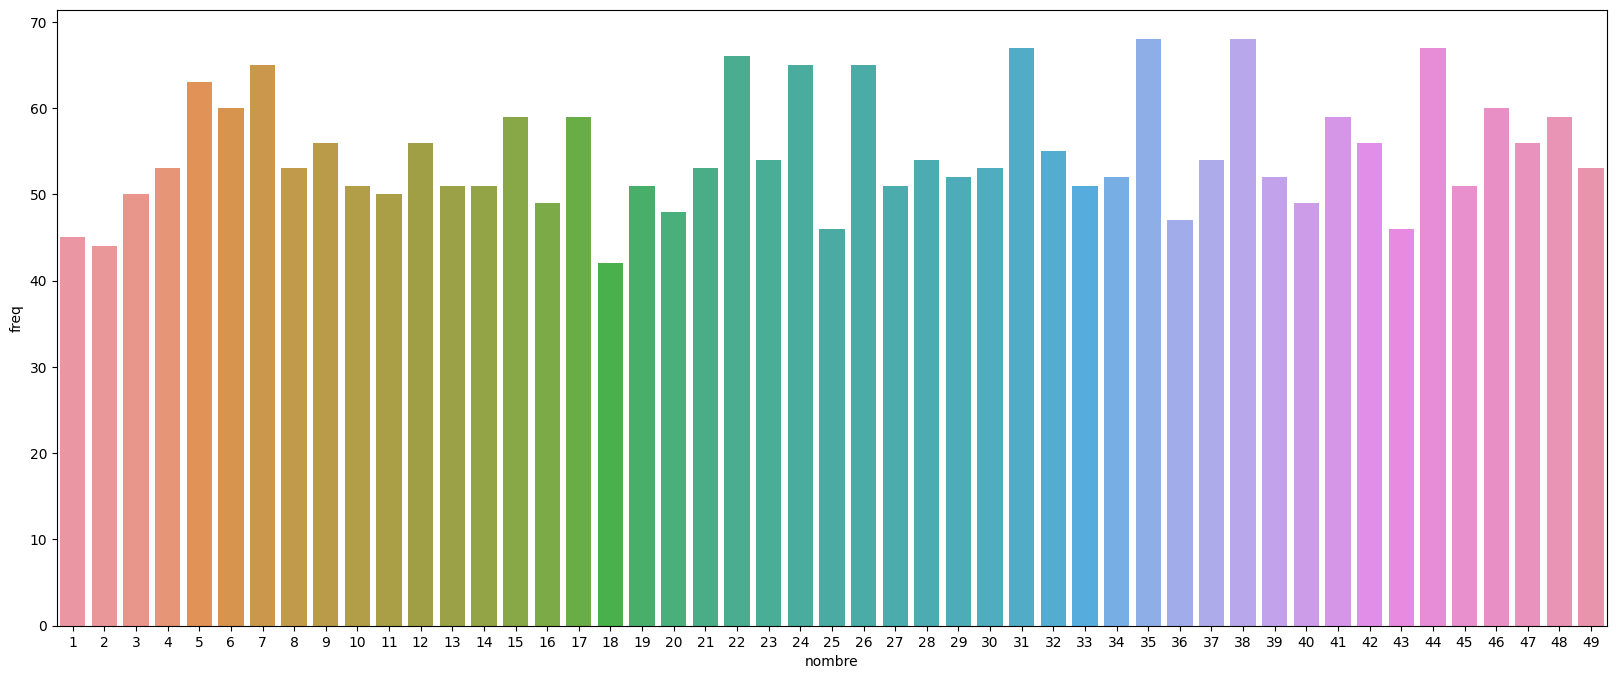

In [10]:
table=[]
for i in range(1,50):
    table.append([i,data.iloc[:,4:9].eq(i).sum().sum()])

df = pd.DataFrame(table,columns=["nombre","freq"])
plt.figure(figsize=(20,8))
sns.barplot(data=df, x=df.nombre, y=df.freq)
plt.show()

In [11]:
print("le chiffre le plus fréquemment sorti : le ",df.iloc[df.freq.idxmax(),0]," avec ", df.freq.max(),"tirages")
print("le chiffre le moins fréquemment sorti :",df.iloc[df.freq.idxmin(),0]," avec ", df.freq.min(),"tirages")

le chiffre le plus fréquemment sorti : le  35  avec  68 tirages
le chiffre le moins fréquemment sorti : 18  avec  42 tirages


### Transformation des ligne de la colonne 'combinaison_gagnante_en_ordre_croissant' et 'combinaison_gagnant_second_tirage_en_ordre_croissant' afin de voir combiend de fois il y a des chiffres qui se suivent

In [12]:
data['combinaison_gagnante_en_ordre_croissant'] = data['combinaison_gagnante_en_ordre_croissant'].apply(lambda x: x.split("+")[0])
data['combinaison_gagnante_en_ordre_croissant'] = data['combinaison_gagnante_en_ordre_croissant'].apply(lambda x: x.split("-"))

In [13]:
data['combinaison_gagnante_en_ordre_croissant']

0       [3, 19, 35, 42, 48]
1      [16, 29, 31, 33, 39]
2      [15, 31, 39, 46, 49]
3      [12, 17, 35, 44, 48]
4       [1, 11, 14, 32, 34]
               ...         
532    [10, 13, 19, 22, 35]
533    [13, 14, 25, 27, 28]
534     [6, 18, 24, 26, 29]
535    [23, 27, 42, 43, 44]
536      [1, 9, 16, 39, 42]
Name: combinaison_gagnante_en_ordre_croissant, Length: 537, dtype: object

## Nombre de tirage depuis qu'un numèro n'est pas sortie

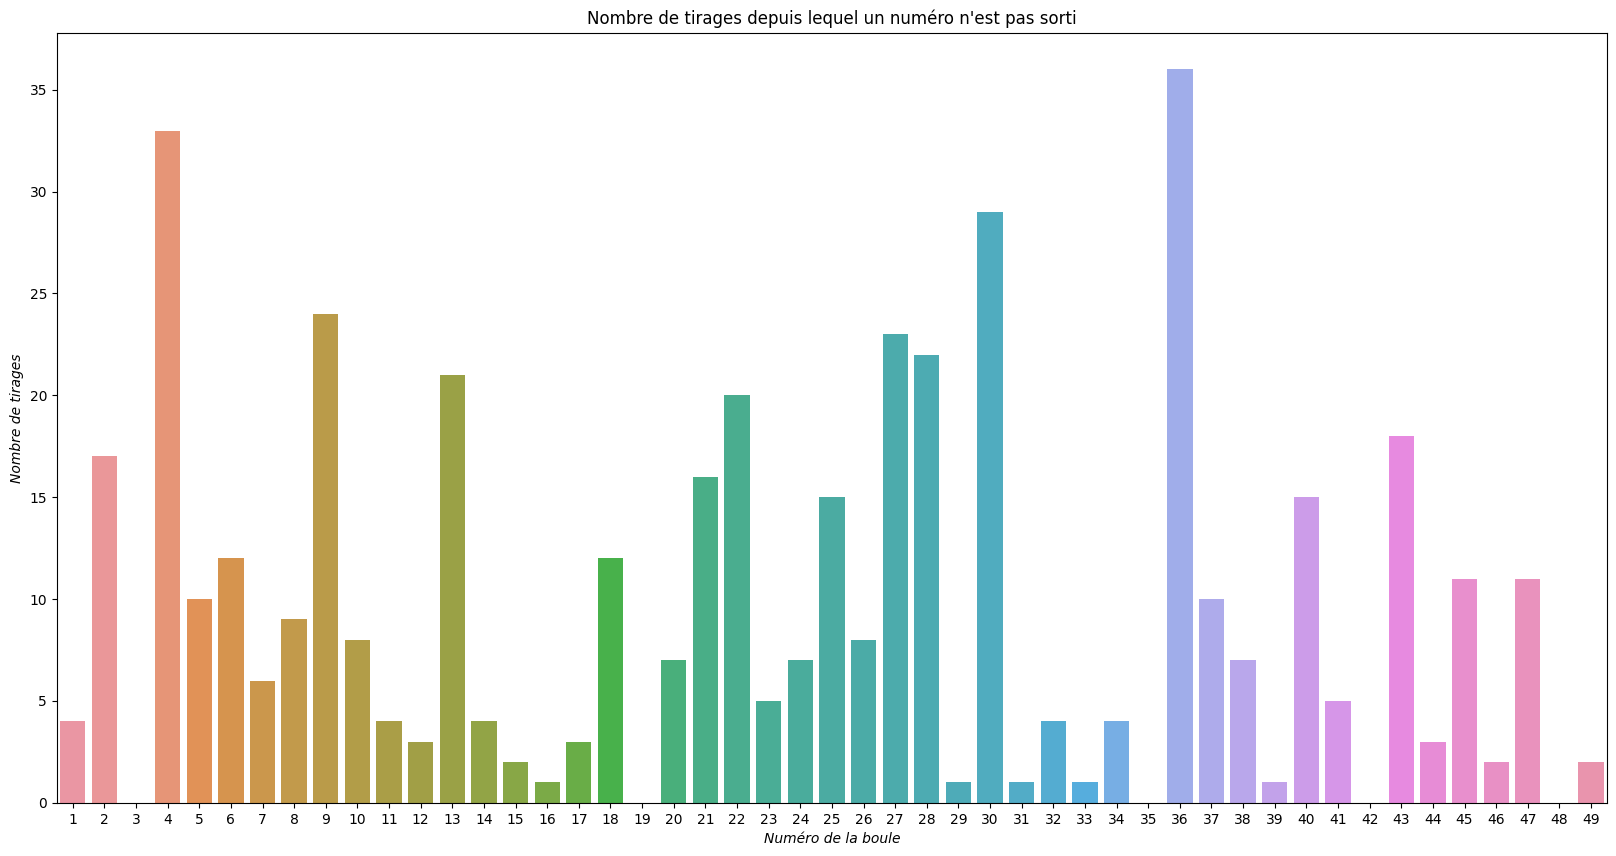

In [14]:
x, y =[],[]
for i in range(1,50):
    for j in data.index:
        if i in list(map(int,data['combinaison_gagnante_en_ordre_croissant'][j])):
            x.append(i)
            y.append(j)
            break


plt.figure(figsize=(20,10))
sns.barplot(x=x,y=y)
plt.title("Nombre de tirages depuis lequel un numéro n'est pas sorti")
plt.xlabel("Numéro de la boule", style='italic')
plt.ylabel("Nombre de tirages", style='italic')
plt.show()

## EDA numero chance

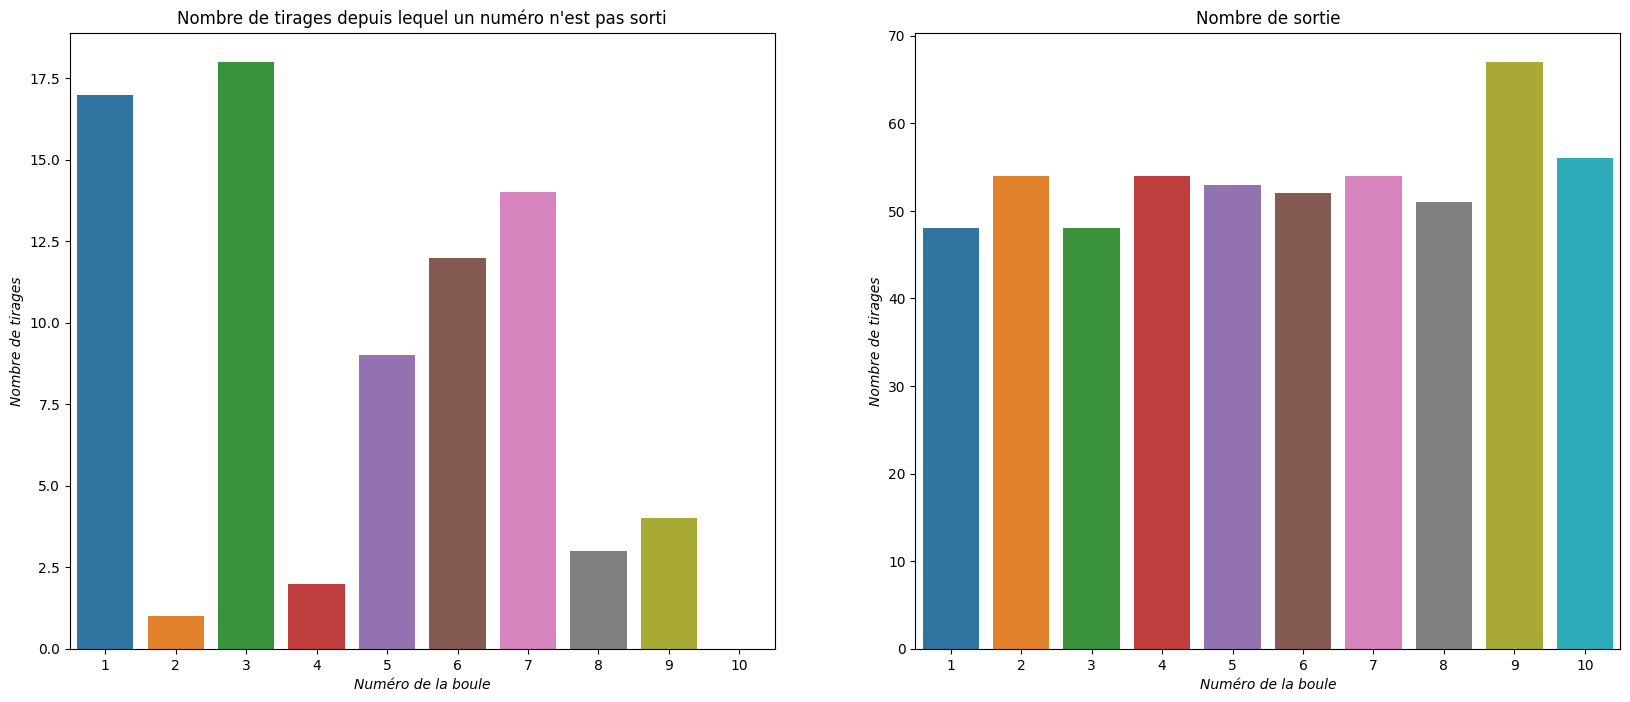

In [15]:
x, y =[],[]
for i in range(1,11):
    for j in data.index:
        if i==data['numero_chance'][j]:
            x.append(i)
            y.append(j)
            break

table=[]
for i in range(1,11):
    table.append([i,data.loc[:,"numero_chance"].eq(i).sum().sum()])
df = pd.DataFrame(table,columns=["nombre","freq"])

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=x,y=y,ax=ax[0])
ax[0].set_title("Nombre de tirages depuis lequel un numéro n'est pas sorti")
ax[0].set_xlabel("Numéro de la boule", style='italic')
ax[0].set_ylabel("Nombre de tirages", style='italic')
sns.barplot(data=df, x=df.nombre, y=df.freq,ax=ax[1])
ax[1].set_title("Nombre de sortie")
ax[1].set_xlabel("Numéro de la boule", style='italic')
ax[1].set_ylabel("Nombre de tirages", style='italic')
plt.show()


### Suite sur les 5 numéros

suite
0.0    327
1.0    188
2.0     21
3.0      1
Name: count, dtype: int64


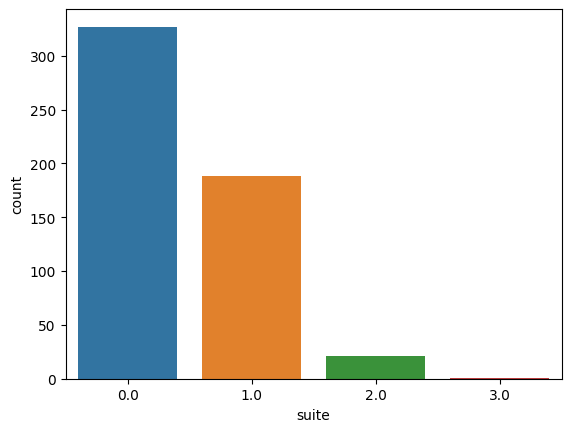

In [16]:
for i in range(data.shape[0]):
    tirage = data.iloc[i,10]
    count=int(0)
    for j in range(4):
        if int(tirage[j])+1==int(tirage[j+1]):
            count+=1
    data.loc[data.index[i],"suite"] = count

print(data["suite"].value_counts())

sns.countplot(x=data["suite"])
plt.show()

In [17]:
print("Pourcentage de tirage sans numéro qui se suivent : ", round(data.loc[data.suite==0,"suite"].value_counts().iloc[0]*100/data.shape[0],2),"%")
print("Pourcentage de tirage avec 2 numéros qui se suivent : ", round(data.loc[data.suite==1,"suite"].value_counts().iloc[0]*100/data.shape[0],2),"%")

Pourcentage de tirage sans numéro qui se suivent :  60.89 %
Pourcentage de tirage avec 2 numéros qui se suivent :  35.01 %


In [18]:
for i in range(data.shape[0]):
    tirage = data.iloc[i,10]
    count=int(0)
    for j in range(3):
        if (int(tirage[j])+1==int(tirage[j+1])) and (int(tirage[j+1])+1==int(tirage[j+2])):
            count+=1
    data.loc[data.index[i],"suite_3"] = count

print("Pourcentage de tirage avec 3 numéros qui se suivent : ", round(data.loc[data.suite_3==1,"suite"].value_counts().iloc[0]*100/data.shape[0],2),"%")

Pourcentage de tirage avec 3 numéros qui se suivent :  1.68 %


### Repartition par dizaines : nombre de dizaine manquante sur un tirage

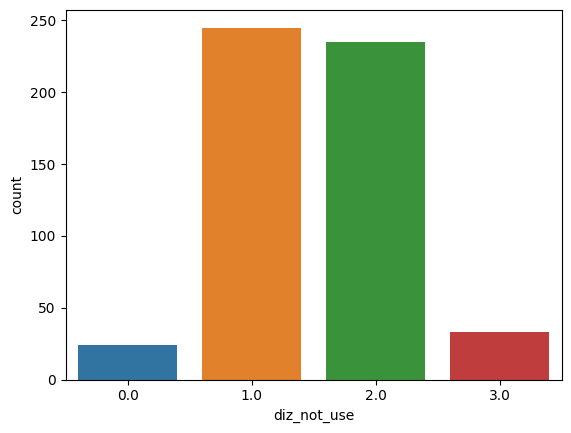

In [19]:
for i in range(data.shape[0]): 
    result=[0,0,0,0,0]
    for j in data.iloc[i,10]:
        if int(j)<10:
            result[0]+=1
        elif int(j)>=10 and int(j)<20:
            result[1]+=1
        elif int(j)>=20 and int(j)<30:
            result[2]+=1
        elif int(j)>=30 and int(j)<40:
            result[3]+=1
        else:
            result[4]+=1
    data.loc[data.index[i],"diz_not_use"]=op.countOf(result, 0)
    
sns.countplot(x=data["diz_not_use"])
plt.show()

#### Il est preferable de retirer les tirages s'il ne manque aucune dizaine et celles où il en manque 3

### La parité

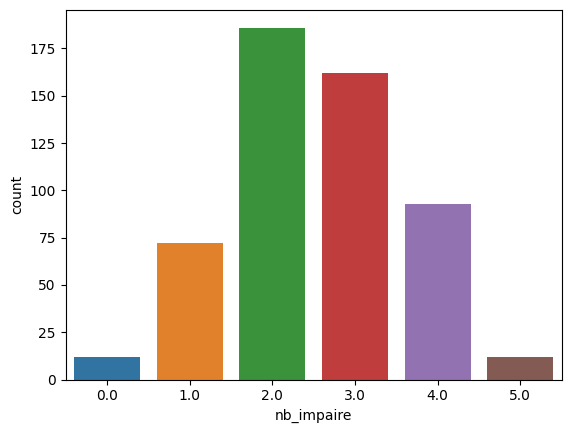

In [20]:
for i in range(data.shape[0]):  
    tirage = data.iloc[i,10]
    somme_tirage=[0,0,0,0,0]
    for j in range(5):
        somme_tirage[j] = int(tirage[j])%2
    somme_impaire = sum(somme_tirage)
    data.loc[data.index[i],"nb_impaire"]=somme_impaire

sns.countplot(x=data["nb_impaire"])
plt.show()

In [21]:
print("Pourcentage de tirage avec 2 ou 3 numero impaire",round(data.loc[(data.nb_impaire==2) | (data.nb_impaire==3),"nb_impaire"].count()*100/data.shape[0],2),"%")

Pourcentage de tirage avec 2 ou 3 numero impaire 64.8 %


## Somme totale des 5 numéeros

In [22]:
for i in range(data.shape[0]):
    liste_str=data.iloc[i,10]
    liste_int = []
    for element in liste_str:
        liste_int.append(int(element))
        data.loc[data.index[i],"somme_tirage"]=sum(liste_int)

In [23]:
print(data.somme_tirage.mean())

126.54748603351955


In [24]:
numeros = list(range(1, 50))
combinaison = itertools.combinations(numeros, 5)
moyenne=[]
for combi in combinaison:
    tirage = list(combi)
    result=sum(tirage)
    moyenne.append(result)
moyenne_all_tirages= sum(moyenne)/len(moyenne)
print(moyenne_all_tirages)

125.0


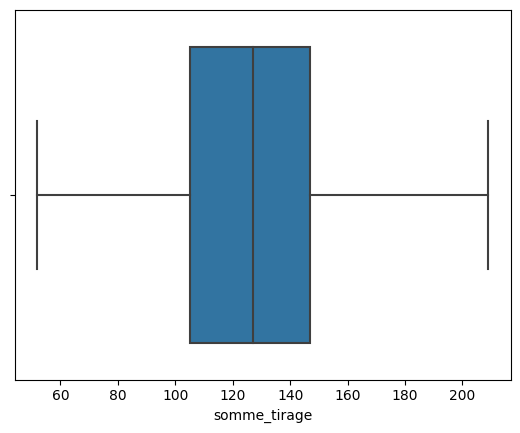

In [25]:
sns.boxplot(x=data.somme_tirage)
plt.show()

In [26]:
Q1,Q2,Q3 = data["somme_tirage"].quantile([0.25,0.5,0.75])
print("Q1 = ",Q1,"\nmediane = ",Q2,"\nQ3 = ",Q3)

Q1 =  105.0 
mediane =  127.0 
Q3 =  147.0


### 50% des tirages se trouvent entre 105 et 147 
### Sur les tirages déja réalisé la somme moyenne des tirages est de 127 alos que statistiquement elle devrait être de 125 => plutôt chercher des tirages inférieur à 127

---
---
---

# Recuperation des infos des derniers tirages récupérés

In [27]:
print(data.iloc[0,1], data.iloc[0,2])
print("N° :", data.iloc[0,0])

SAMEDI   08/04/2023
N° : 20233042


# Algo permettant de minimiser le nombre de combinaisons à jouer

### nombre de combinaison total des 5 boules uniquement

In [28]:
# Création d'une liste des numéros possibles (1-49)
numeros = list(range(1, 50))
combinaison = itertools.combinations(numeros, 5)
count=0
for combi in combinaison:
    count+=1
print("Nombre de combinaisons possible des 5 boules : ", count)

Nombre de combinaisons possible des 5 boules :  1906884


### Nombre de combinaisons des 5 boules en retirants les tirages peu probable

In [29]:
# Comparer les numéros voulus par l'utilisateur à ceux présent dans le tirage
def numeros_voulus(tirage,liste_numeros_voulus):
    count=0
    for i in liste_numeros_voulus:
        if i in tirage:
            count+=1
        else:
            pass
    if count==len(liste_numeros_voulus):
        return True
    else:
        return False

# Comparer les numéros non voulus par l'utilisateur à ceux présent dans le tirage
def numeros_non_voulus(tirage,liste_numeros_non_voulus):
    count=0
    for i in liste_numeros_non_voulus:
        if i in tirage:
            count+=1
        else:
            pass
    if count==0:
        return True
    else:
        return False
    
# Retirer les tirages qui ont 3 chiffres consécutifs
def numeros_consecutifs_3(tirage,option):
    if option==True:
        count=0        
        for j in range(3):
            if (int(tirage[j])+1==int(tirage[j+1])) and (int(tirage[j+1])+1==int(tirage[j+2])): # si 3 numero consecutifs differetns alors on continue la selection
                count+=1
            else:
                pass
        if count==0:
            return True
        else:
            return False
    else:
        return True
    
# Retirer les tirages qui ont 2 chiffres consecutifs
def numeros_consecutifs_2(tirage,option):
    count=0
    for i in range(4):
        if tirage[i]+1==tirage[i+1] and tirage[i+1]+1==tirage[i+2]:
            return False
        else: 
            return True
    

# Choix du nombre de dizaine repésentées dans le tirage
def nb_dizaine(tirage,dizaine):
    result=[0,0,0,0,0]      
    for j in tirage:
        if j<10:
            result[0]+=1
        elif j>=10 and j<20:      #
            result[1]+=1                    #
        elif j>=20 and j<30:      #   On va classer chaque chiffre d'un tirage dans une dizaine
            result[2]+=1                    #
        elif j>=30 and j<40:      #
            result[3]+=1
        else:
            result[4]+=1
    diz = op.countOf(result, 0)        #   On regarde le nombre de dizaine à 0          
    diz_min, diz_max=dizaine[0], dizaine[1]
    if diz>=diz_min and diz<=diz_max:
        return True
    else:
        return False

def nb_paire(tirage,liste_parite):
    parite=[0,0,0,0,0]      
    for j in range(5):                   
        parite[j] = tirage[j]%2
    somme_impaire = sum(parite)
    if somme_impaire>=liste_parite[0] and somme_impaire<=liste_parite[1]:
        return True
    else:
        return False
    
def somme(tirage, liste_somme):
    somme_tirage=sum(tirage)
    if somme_tirage>=liste_somme[0] and somme_tirage<=liste_somme[1]:     # si la somme des chiffres du tirage est compris dans la fourchette alors on continue
        return True
    else:
        return False

In [30]:
option_suivi_3 = True # Si la combinaison contient 3 numéros qui se suivent la combinaison ne sera pas retenue
option_suivi_2 = True
parite=[2,3]
liste_somme=[105,130]
numeros = list(range(1, 50))
combinaison = itertools.combinations(numeros, 5)
numeros_utilisateur=[18,1]
numeros_non_utilisateur=[8,45]
dizaine=[2,3] # Tranche de dizaine voulues
count =0
jeux_df = pd.DataFrame(columns=['N1','N2','N3','N4','N5','NChance'])
boule_chance=10

for combi in combinaison:
    tirage = list(combi)
    if numeros_voulus(tirage,numeros_utilisateur): # SI un numéros voulus par l'utilisateur est présent dans le tirage on continu 
        if numeros_non_voulus(tirage,numeros_non_utilisateur): # SI un numéro non voulu par l'utilisateur est présent on retire le tirage
            if numeros_consecutifs_3(tirage,option_suivi_3): # S'il y a 3 chiffres consécutif on supprime le tirage
                if nb_dizaine(tirage,dizaine): # On ne garde que les tirages avec le nombre de dizaines voulus par l'utilisateur
                    if numeros_consecutifs_2(tirage,option_suivi_3): # Si deux numéros consécutifs on supprime le tirage
                        if nb_paire(tirage,parite): # Si un tirage ne contient pas le nombre de numéro paire voulu par l'utilisateur il sera retiré
                            if somme(tirage,liste_somme):# Si la somme des num"ros du tirage correspond à la fourchette voulue par l'utilisateur on conserve le tirage
                                tirage.append(boule_chance)
                                temp_df = pd.DataFrame({'N1':tirage[0],'N2':tirage[1],'N3':tirage[2],
                                                       'N4':tirage[3],'N5':tirage[4],'NChance':tirage[5]},index=[0])
                                jeux_df = pd.concat([jeux_df, temp_df], ignore_index=True)
                                count+=1
                            else:
                                pass
                        else:
                            pass
                    else:
                        pass
                else:
                    pass
            else:
                pass
        else:
            pass
    else:
        pass
print("Combinaisons restantes :",count)
jeux_df.to_csv('/home/kevin/workspace/py-sql/loto/data/selection.csv')

Combinaisons restantes : 623


In [31]:
verif = pd.read_csv('/home/kevin/workspace/py-sql/loto/data/selection.csv')
verif.head()

,Unnamed: 0,N1,N2,N3,N4,N5,NChance
0,0,1,2,18,40,47,10
1,1,1,2,18,40,49,10
2,2,1,2,18,41,43,10
3,3,1,2,18,41,44,10
4,4,1,2,18,41,46,10


## Affichage des 5 derniers tirages 

In [32]:
for i in range(5):
    jour = data.iloc[i,1]
    date = data.iloc[i,2]
    n1 = data.loc[i,"boule_1"]
    n2 = data.loc[i,"boule_2"]
    n3 = data.loc[i,"boule_3"]
    n4 = data.loc[i,"boule_4"]
    n5 = data.loc[i,"boule_5"]
    bc = data.loc[i,"numero_chance"]
    print(jour, date, n1, n3, n3, n4, n5,"*", bc)

SAMEDI   08/04/2023 19 48 48 3 42 * 10
MERCREDI 05/04/2023 31 16 16 29 39 * 2
LUNDI    03/04/2023 49 39 39 31 46 * 4
SAMEDI   01/04/2023 44 17 17 12 35 * 8
MERCREDI 29/03/2023 34 32 32 14 11 * 9



# A faire...
                                # faire un code permettant de voir les numéros les mieux assortis ensemlble
                                # Ajouter à l'appli streamlit les numeros les mieux assortis
                                # Permettre la comparaison des combinaisons sauvegarées avec un tirage
                                    => nombre de combinaisons gagnantes, gains générés , plus-values....
                                # Ajouter une IA non supervisée pour encore réduire le nombre de possibiltés
                                
                                